In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1/2019', end='31/12/2019', freq='D')
np.random.seed(1)

In [2]:
df = pd.DataFrame(date_rng, columns=['date'])
No_of_ypos=150
No_of_xpos=5
days_of_travel=30 # Assuming the days of travel to be 30 and ship will cross 1 ypos in 1 day

In [3]:
A0=np.random.randint(100, size=(len(date_rng), No_of_ypos*No_of_xpos)) #Sensor data from nodes
#B=np.ones_like(A) 
B=np.random.randint(2,size=(len(date_rng), No_of_ypos*No_of_xpos)) # datasets from fisheries about fish reproduction region
#Creating a rejection criterion
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        if B[i,j]==0:
            B[i,j]=10
A=A0*B

In [4]:
x=pd.DataFrame(A)
y=pd.DataFrame(A0)

In [5]:
data=pd.concat([df, x],axis=1)
data_wo=pd.concat([df, y],axis=1)

In [6]:
data.head()

,date,0,1,2,3,4,5,6,7,8,...,740,741,742,743,744,745,746,747,748,749
0,2019-01-01,37,12,720,90,75,50,790,64,160,...,96,96,41,240,21,270,46,35,62,68
1,2019-01-02,620,320,45,880,42,570,250,320,33,...,84,750,76,90,180,62,45,650,520,280
2,2019-01-03,87,380,20,97,510,590,94,64,14,...,760,870,610,2,22,820,930,980,470,29
3,2019-01-04,950,98,800,1,750,1,52,92,640,...,42,67,98,13,25,38,75,50,92,220
4,2019-01-05,39,73,140,47,710,10,330,700,60,...,390,14,220,26,150,81,76,920,26,490


In [7]:
#finding the optimum path
pos=np.zeros(days_of_travel)
col=1;
sol=500;
for i in range(days_of_travel):
    for j in range(No_of_xpos):
        y=data.iloc[i,col+j]
        if y<sol:
            sol=y
            pos[i]=col+j
        else:
            sol=sol
    col=col+No_of_xpos
    sol=500
    


In [8]:
pos

array([  2.,   9.,  13.,  17.,  25.,  30.,  33.,  40.,  43.,  48.,  55.,
        56.,  65.,  68.,  74.,  80.,  84.,  89.,  91.,  99., 104., 107.,
       111., 118., 125., 129., 135., 139., 141., 146.])

In [10]:
#data visualization
#creating the relevant matrix data
col=1;
picture0=np.zeros((days_of_travel,No_of_xpos))
for i in range(days_of_travel):
    for j in range(No_of_xpos):
        picture0[i,j]=data.iloc[i,col+j]
    col=col+No_of_xpos
#creating the relevant matrix data_wo
col=1;
picture1=np.zeros((days_of_travel,No_of_xpos))
for i in range(days_of_travel):
    for j in range(No_of_xpos):
        picture1[i,j]=data_wo.iloc[i,col+j]
    col=col+No_of_xpos

In [12]:
picture0

array([[ 37.,  12., 720.,  90.,  75.],
       [570., 250., 320.,  33.,  60.],
       [ 52., 440.,  16., 640.,  30.],
       [ 49.,  14.,  73., 210., 320.],
       [580., 120., 750.,  53.,  24.],
       [ 49., 880., 450., 860.,  30.],
       [ 42.,  62.,  23., 160.,  88.],
       [230.,  19., 300.,  40.,   7.],
       [ 79., 360.,   0.,  12.,  23.],
       [470., 460.,   0.,  52.,  97.],
       [ 67.,  43., 320., 720.,  33.],
       [ 79., 730.,  93., 380., 380.],
       [980.,  58.,  12.,  16.,   2.],
       [ 42.,  54.,  40., 960.,  56.],
       [ 25., 670.,  15.,   8., 920.],
       [540., 320., 670.,  41.,  37.],
       [670., 110., 430.,  12.,  63.],
       [ 49.,  50., 840.,  46., 730.],
       [ 23.,  67., 270., 230., 370.],
       [650., 510.,  71.,  30., 590.],
       [ 21.,  17.,  25.,  10.,  28.],
       [210.,  19.,  95.,  98.,  89.],
       [ 45.,  90., 420.,  71., 200.],
       [450., 520.,  95., 280., 360.],
       [ 46., 360., 800., 290.,   4.],
       [740., 690.,  44.,

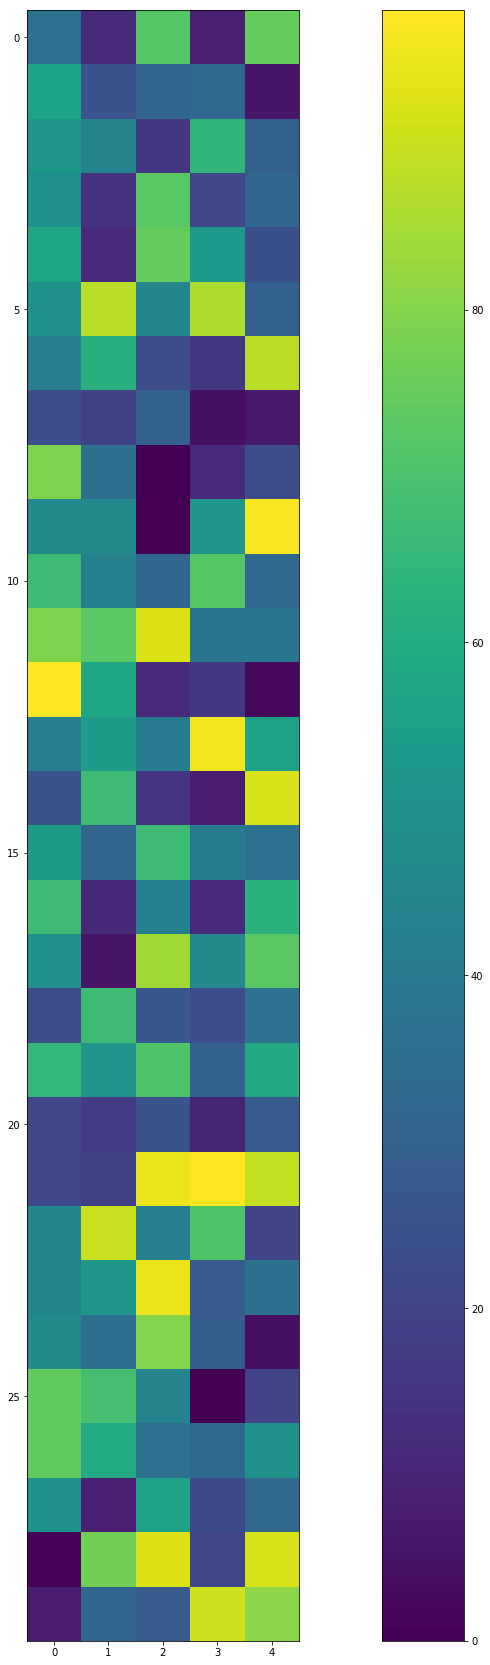

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
plt.imshow(picture1)
plt.colorbar()
plt.show()

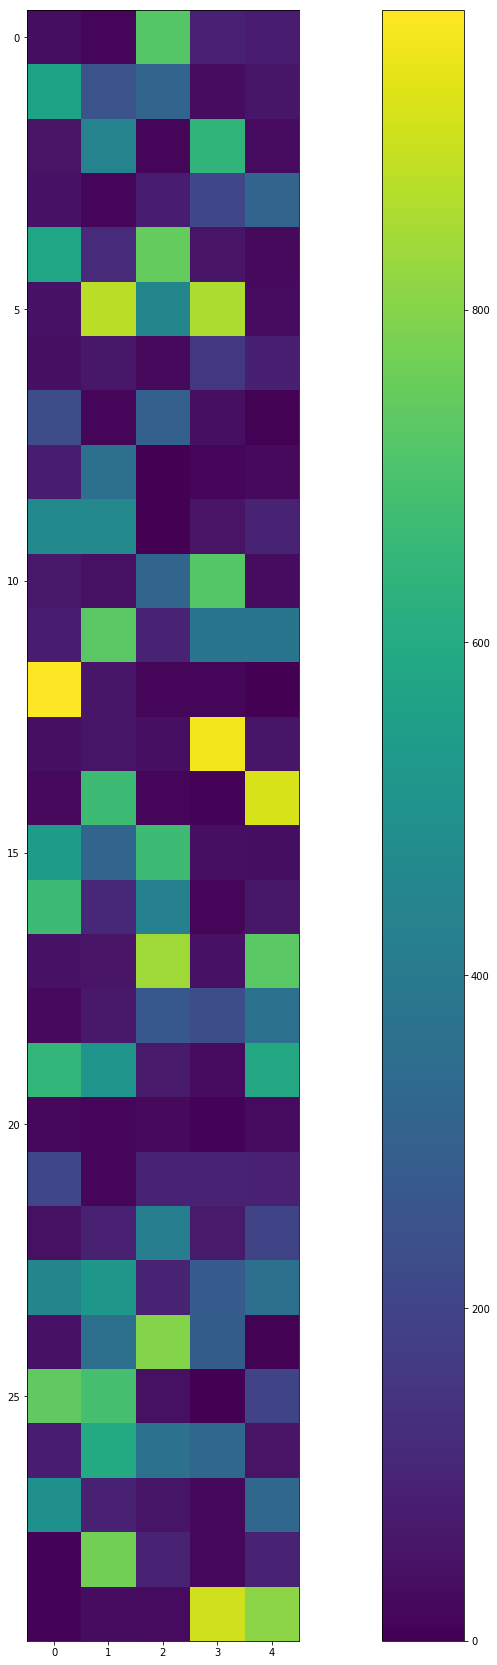

In [14]:
fig=plt.figure(figsize=(30,30))
plt.imshow(picture0)
plt.colorbar()
plt.show()